## Project: WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
import math
from datetime import date

# call today date to show the date when the results were run
# as the temperture is changing realtime
today = date.today()

# create this fucntion to round up and get a nice x-axis and y-axis labels
def round_up(var):
    return int(math.ceil(var / 10.0)) * 10

def round_dn(var):
    return int(math.floor(var / 10.0)) * 10

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
cities = [citi.title() for citi in cities]
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create base url for API access
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# create empty list to hold each city parameters and group data set
weather_response_master =[]
lat = []
lng = []
cloudi_n = []
country = []
date = []
humid =[]
maxtemp = []
wind_spd =[]
count = 0 
set = 1
invalid_ct = 0

# specify what unit system to be used
units = "imperial"


# looping to store data

print("BEGINNING DATA RETRIEVAL ...\n\
=========================================================")
for each_city in cities:
    city = each_city
    Qry_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_response_each_city = requests.get(Qry_url).json()
    
    # While looping, if city not found, create message for it and keep going
    # After reviewing the data, "code = 404" is the best indication of blank database = city not found
    # if this condition is not set correctly, record is still store the empty database as valid database (not desired)
    if weather_response_each_city['cod'] == '404':
        print(f'City \033[1;34m"{each_city}"\033[00m \033[1;31mNOT FOUND !!! \033[00m Skipping...')
        invalid_ct += 1
    else:
        count += 1
        if count <50:
            set = set
        else:
            set = set + 1
            count = 1
        weather_response_master.append(weather_response_each_city)
        print(f'Processing\033[1;34m Records # {count}\033[00m of \033[1;34mSet # {set}\033[00m | \033[1;32m{each_city}\033[00m')
        lat.append(weather_response_each_city['coord']['lat'])
        lng.append(weather_response_each_city['coord']['lon'])
        cloudi_n.append(weather_response_each_city['clouds']['all'])
        country.append(weather_response_each_city['sys']['country']) 
        date.append(weather_response_each_city['dt']) 
        humid.append(weather_response_each_city['main']['humidity']) 
        maxtemp.append(weather_response_each_city['main']['temp_max']) 
        wind_spd.append(weather_response_each_city['wind']['speed'])

print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print(f'There are: \033[1;34m{invalid_ct}\033[00m cities with \033[1;31mNO RECORDS\033[00m.')
print('=-=-=-=-=-=-=-=-=END OF DATA RETRIEVAL-=-=-=-=-=-=-=-=')      

BEGINNING DATA RETRIEVAL ...
Processing Records # 1 of Set # 1 | Pascagoula
Processing Records # 2 of Set # 1 | Kokuy
Processing Records # 3 of Set # 1 | Busselton
Processing Records # 4 of Set # 1 | Tasiilaq
Processing Records # 5 of Set # 1 | Jamestown
Processing Records # 6 of Set # 1 | Nhulunbuy
Processing Records # 7 of Set # 1 | New Norfolk
Processing Records # 8 of Set # 1 | Iaciara
Processing Records # 9 of Set # 1 | Vaini
Processing Records # 10 of Set # 1 | Punta Arenas
Processing Records # 11 of Set # 1 | Tiksi
Processing Records # 12 of Set # 1 | Bilma
Processing Records # 13 of Set # 1 | Glendive
Processing Records # 14 of Set # 1 | Albany
Processing Records # 15 of Set # 1 | Lorengau
Processing Records # 16 of Set # 1 | Bethel
City "Mys Shmidta" NOT FOUND !!!  Skipping...
Processing Records # 17 of Set # 1 | Naze
Processing Records # 18 of Set # 1 | Khani
Processing Records # 19 of Set # 1 | Hobart
Processing Records # 20 of Set # 1 | Kapaa
Processing Records # 21 of Set 

Processing Records # 44 of Set # 2 | Klaksvik
Processing Records # 45 of Set # 2 | Kurumkan
Processing Records # 46 of Set # 2 | Arraial Do Cabo
Processing Records # 47 of Set # 2 | Krasnoarmeysk
Processing Records # 48 of Set # 2 | Mount Gambier
Processing Records # 49 of Set # 2 | La Trinidad
Processing Records # 1 of Set # 3 | Caravelas
Processing Records # 2 of Set # 3 | Hasaki
Processing Records # 3 of Set # 3 | Taoudenni
Processing Records # 4 of Set # 3 | Ukiah
Processing Records # 5 of Set # 3 | Mehamn
Processing Records # 6 of Set # 3 | Vanimo
Processing Records # 7 of Set # 3 | Kodiak
Processing Records # 8 of Set # 3 | Srednekolymsk
Processing Records # 9 of Set # 3 | Cabo San Lucas
Processing Records # 10 of Set # 3 | Ostrovnoy
Processing Records # 11 of Set # 3 | Jutai
Processing Records # 12 of Set # 3 | Iqaluit
Processing Records # 13 of Set # 3 | Souillac
Processing Records # 14 of Set # 3 | Lata
Processing Records # 15 of Set # 3 | Tuktoyaktuk
Processing Records # 16 o

City "Nizhneyansk" NOT FOUND !!!  Skipping...
Processing Records # 41 of Set # 4 | Vila Franca Do Campo
Processing Records # 42 of Set # 4 | Coihaique
Processing Records # 43 of Set # 4 | Nikolskoye
Processing Records # 44 of Set # 4 | Faanui
Processing Records # 45 of Set # 4 | Kathu
Processing Records # 46 of Set # 4 | Saint-Augustin
Processing Records # 47 of Set # 4 | Eirunepe
Processing Records # 48 of Set # 4 | Chachapoyas
City "Tidore" NOT FOUND !!!  Skipping...
City "Tasbuget" NOT FOUND !!!  Skipping...
Processing Records # 49 of Set # 4 | Westport
City "Chengmai" NOT FOUND !!!  Skipping...
Processing Records # 1 of Set # 5 | Puerto Ayora
Processing Records # 2 of Set # 5 | Macapa
Processing Records # 3 of Set # 5 | Khairagarh
Processing Records # 4 of Set # 5 | Kavieng
Processing Records # 5 of Set # 5 | Ribeira Grande
Processing Records # 6 of Set # 5 | Los Llanos De Aridane
Processing Records # 7 of Set # 5 | Ketchikan
Processing Records # 8 of Set # 5 | Norman Wells
Process

Processing Records # 31 of Set # 6 | Nanortalik
Processing Records # 32 of Set # 6 | Boda
Processing Records # 33 of Set # 6 | Ivanteyevka
Processing Records # 34 of Set # 6 | Nacozari
Processing Records # 35 of Set # 6 | Amapa
Processing Records # 36 of Set # 6 | San Rafael
Processing Records # 37 of Set # 6 | Santa Rosa
Processing Records # 38 of Set # 6 | Naryan-Mar
Processing Records # 39 of Set # 6 | Balkanabat
Processing Records # 40 of Set # 6 | Pacifica
Processing Records # 41 of Set # 6 | Yilan
Processing Records # 42 of Set # 6 | Altamira
Processing Records # 43 of Set # 6 | Starkville
Processing Records # 44 of Set # 6 | Magdagachi
Processing Records # 45 of Set # 6 | Santa Vitoria Do Palmar
Processing Records # 46 of Set # 6 | Basco
Processing Records # 47 of Set # 6 | Pangnirtung
Processing Records # 48 of Set # 6 | Yashkul
Processing Records # 49 of Set # 6 | Puerto Escondido
Processing Records # 1 of Set # 7 | Coquimbo
Processing Records # 2 of Set # 7 | Zabid
Processing

City "Igarape-Miri" NOT FOUND !!!  Skipping...
Processing Records # 26 of Set # 8 | Hajnowka
Processing Records # 27 of Set # 8 | Sinjar
Processing Records # 28 of Set # 8 | Nouadhibou
Processing Records # 29 of Set # 8 | Chuy
City "Mahaicony" NOT FOUND !!!  Skipping...
Processing Records # 30 of Set # 8 | Sovetskaya Gavan
Processing Records # 31 of Set # 8 | Sao Joao Da Barra
Processing Records # 32 of Set # 8 | Sazonovo
Processing Records # 33 of Set # 8 | Lavrentiya
Processing Records # 34 of Set # 8 | Kruisfontein
Processing Records # 35 of Set # 8 | Lagoa
Processing Records # 36 of Set # 8 | Tura
Processing Records # 37 of Set # 8 | Cervo
Processing Records # 38 of Set # 8 | Stepnoye
Processing Records # 39 of Set # 8 | Flagstaff
Processing Records # 40 of Set # 8 | Rawlins
Processing Records # 41 of Set # 8 | Nuuk
Processing Records # 42 of Set # 8 | Kaspiyskiy
Processing Records # 43 of Set # 8 | Kpandae
Processing Records # 44 of Set # 8 | Bowen
Processing Records # 45 of Set #

Processing Records # 20 of Set # 10 | Traverse City
Processing Records # 21 of Set # 10 | Lodwar
Processing Records # 22 of Set # 10 | Apen
Processing Records # 23 of Set # 10 | Pacific Grove
Processing Records # 24 of Set # 10 | Jiwani
Processing Records # 25 of Set # 10 | Kailua
Processing Records # 26 of Set # 10 | Beloha
Processing Records # 27 of Set # 10 | Koungou
Processing Records # 28 of Set # 10 | Menongue
Processing Records # 29 of Set # 10 | Lompoc
Processing Records # 30 of Set # 10 | Victor Harbor
Processing Records # 31 of Set # 10 | Houma
Processing Records # 32 of Set # 10 | Hualmay
Processing Records # 33 of Set # 10 | Dukat
Processing Records # 34 of Set # 10 | Daru
Processing Records # 35 of Set # 10 | Chapleau
Processing Records # 36 of Set # 10 | Voyvozh
Processing Records # 37 of Set # 10 | Griffith
Processing Records # 38 of Set # 10 | Scarborough
City "Rawannawi" NOT FOUND !!!  Skipping...
Processing Records # 39 of Set # 10 | Ponta Delgada
Processing Records #

Processing Records # 15 of Set # 12 | Orbetello
Processing Records # 16 of Set # 12 | Henderson
Processing Records # 17 of Set # 12 | Russell
Processing Records # 18 of Set # 12 | Alice Springs
Processing Records # 19 of Set # 12 | Pathardi
Processing Records # 20 of Set # 12 | Oxford
Processing Records # 21 of Set # 12 | Yazoo City
Processing Records # 22 of Set # 12 | Pangody
Processing Records # 23 of Set # 12 | Orizatlan
Processing Records # 24 of Set # 12 | Mandalgovi
Processing Records # 25 of Set # 12 | Kaa-Khem
Processing Records # 26 of Set # 12 | Lethem
Processing Records # 27 of Set # 12 | Peremyshl
Processing Records # 28 of Set # 12 | Mitu
City "Burica" NOT FOUND !!!  Skipping...
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
There are: 57 cities with NO RECORDS.
=-=-=-=-=-=-=-=-=END OF DATA RETRIEVAL-=-=-=-=-=-=-=-=


In [4]:
# Verify data integrity while looping

if len(cities) == len(country) + invalid_ct:
    print(f'All records are accounted for.')
else:
    print(f'Missing {len(cities) - len(country) - invalid_ct} records.')

All records are accounted for.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
main_df = pd.DataFrame({
    "City_ID" : [C_ID for C_ID in range(0, len(country))],
    "Country" : country,
    "Date" : date,
    "Latitude" : lat,
    "Longitude" : lng,
    "Cloudiness" : cloudi_n,
    "Humidity" : humid,
    "Max Temp" : maxtemp,
    "Wind Speed" : wind_spd
     })

main_df.to_csv(output_data_file, index=False)
main_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,US,1584253482,30.37,-88.56,90,93,68.00,2.35
1,1,RU,1584253623,52.20,117.55,0,68,28.71,7.34
2,2,AU,1584253623,-33.65,115.33,14,46,81.00,15.43
3,3,GL,1584253412,65.61,-37.64,41,64,-0.40,3.36
4,4,US,1584253521,42.10,-79.24,90,92,33.80,6.93
...,...,...,...,...,...,...,...,...,...
562,562,MN,1584253711,45.76,106.27,48,22,43.18,21.88
563,563,RU,1584253711,51.68,94.73,100,74,20.03,1.01
564,564,GY,1584253711,3.38,-59.80,98,75,78.69,12.10
565,565,RU,1584253712,54.26,36.16,75,73,23.00,15.66


In [6]:
main_df.count()

City_ID       567
Country       567
Date          567
Latitude      567
Longitude     567
Cloudiness    567
Humidity      567
Max Temp      567
Wind Speed    567
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

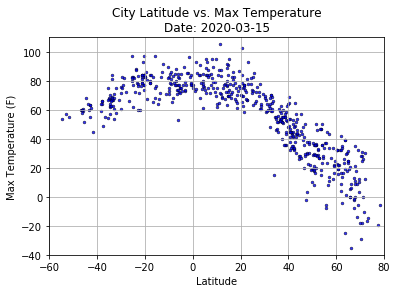

In [7]:
# Define data to plot
x_axis_lat_temp = main_df['Latitude']
y_axis_lat_temp = main_df['Max Temp']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(round_dn(x_axis_lat_temp.min()),\
         round_up(x_axis_lat_temp.max()))
plt.ylim(round_dn(y_axis_lat_temp.min()),\
         round_up(y_axis_lat_temp.max()))
plt.title(f"City Latitude vs. Max Temperature\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_temp, y_axis_lat_temp, linewidths=0.5, \
            marker ='o', facecolors='b', edgecolors='k', alpha= 0.8, s = 8)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_temp.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Humidity Plot

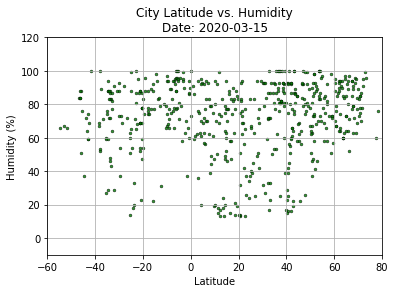

In [8]:
# Define data to plot
x_axis_lat_humd = main_df['Latitude']
y_axis_lat_humd = main_df['Humidity']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(round_dn(x_axis_lat_humd.min()),\
         round_up(x_axis_lat_humd.max()))
plt.ylim(round_dn(y_axis_lat_humd.min()) - 20,\
         round_up(y_axis_lat_humd.max()) + 20)
plt.title(f"City Latitude vs. Humidity\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_humd, y_axis_lat_humd, linewidths=0.5, \
            marker ='o', facecolors='g', edgecolors='k', alpha= 0.8, s = 8)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_humd.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Cloudiness Plot

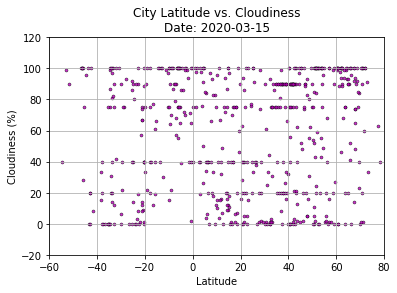

In [9]:
# define data to plot
x_axis_lat_cld = main_df['Latitude']
y_axis_lat_cld = main_df['Cloudiness']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(round_dn(x_axis_lat_cld.min()),\
         round_up(x_axis_lat_cld.max()))
plt.ylim(round_dn(y_axis_lat_cld.min()) - 20,\
         round_up(y_axis_lat_cld.max()) + 20)
plt.title(f"City Latitude vs. Cloudiness\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_cld, y_axis_lat_cld, linewidths=0.5, \
            marker ='o', facecolors = 'm', edgecolors = 'k',\
            alpha = 0.8, s = 9)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_cld.name
plt.savefig(file_name)
plt.show()

#### Latitude vs. Wind Speed Plot

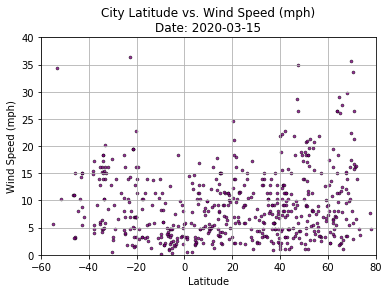

In [10]:
# define data to plot
x_axis_lat_wnspd = main_df['Latitude']
y_axis_lat_wnspd = main_df['Wind Speed']

# chart parameters
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(round_dn(x_axis_lat_wnspd.min()),\
         round_up(x_axis_lat_wnspd.max()))
plt.ylim(round_dn(y_axis_lat_wnspd.min()),\
         round_up(y_axis_lat_wnspd.max()))
plt.title(f"City Latitude vs. Wind Speed (mph)\nDate: {today}")
plt.grid(linestyle = "-", linewidth = 0.8)
plt.scatter(x_axis_lat_wnspd, y_axis_lat_wnspd, linewidths=0.5, \
            marker ='o', facecolors = 'purple', edgecolors = 'k',\
            alpha = 0.8, s = 9)

# plot and save image file "*.png"
file_name = "Images/" + y_axis_lat_wnspd.name
plt.savefig(file_name)
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
# Print out the r-squared value along with the plot.
def lin_regr (x_lin, y_lin, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_lin, y_lin)
    
     # print r-sqr values
    print('---------------------------------------------')
    print(f"The r-squared value is: \033[1;34m{round(rvalue, 2)}\033[00m") 
    
    # regression equation
    regress_values = x_lin * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'Linear Regression: \033[1;31m{line_eq}\033[00m')
    print('---------------------------------------------')
    
    # create plot parameters
    plt.scatter(x_lin, y_lin, linewidths=0.5, \
            marker ='o', facecolors = 'g', edgecolors = 'k',\
            alpha = 0.8, s = 10)
    plt.plot(x_lin,regress_values,"r-", )
    x_var_mean = x_lin.median()
    y_var_mean = (y_lin.mean() + y_lin.max()) /2
    plt.annotate(line_eq,
                 xy = (x_var_mean, y_var_mean),
                 xycoords='data',
                 xytext=(5, -5),
                 va='bottom',
                 textcoords='offset points', 
                 fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(linestyle = "-", linewidth = 0.3)
    
    
    # print correct hemisphere region for chart name and title based on latitude
    if x_lin.mean() < 0:   # South hemisphere : negative latitudes
        title =  f'Southern Hemisphere | Date: {today}\n{x_label} vs. {y_label}'
        plt.title(title)
        file_name = "Images/" + "Southern_" + y_lin.name
        plt.savefig(file_name)
                 
    else:
        title =  f'Northern Hemisphere | Date: {today}\n{x_label} vs. {y_label}'
        plt.title(title)
        file_name = "Images/" + "Northern_" + y_lin.name
        plt.savefig(file_name)  

---------------------------------------------
The r-squared value is: 0.1
Linear Regression: y = 0.02x + 8.63
---------------------------------------------


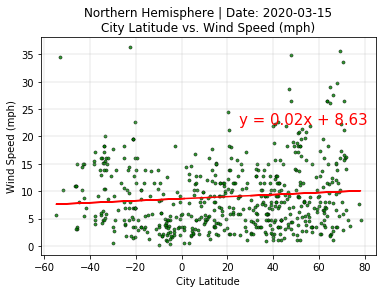

In [12]:
# TEST if the function is working

x_axis_lat_wnspd = main_df['Latitude']
y_axis_lat_wnspd = main_df['Wind Speed']
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

lin_regr (x_axis_lat_wnspd, y_axis_lat_wnspd, x_label, y_label)

# Delete the trial run picture after verifying
import os
try:
    os.remove("Images/" + "Southern_" + y_axis_lat_wnspd.name + ".png")
except: 
    os.remove("Images/" + "Northern_" + y_axis_lat_wnspd.name + ".png")


In [13]:
# Create Northern and Southern Hemisphere DataFrames
nth_hem_df = main_df.loc[main_df["Latitude"] > 0, :]
nth_hem_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,0,US,1584253482,30.37,-88.56,90,93,68.00,2.35
1,1,RU,1584253623,52.20,117.55,0,68,28.71,7.34
3,3,GL,1584253412,65.61,-37.64,41,64,-0.40,3.36
4,4,US,1584253521,42.10,-79.24,90,92,33.80,6.93
10,10,RU,1584253456,71.69,128.87,60,78,-10.80,6.53
...,...,...,...,...,...,...,...,...,...
562,562,MN,1584253711,45.76,106.27,48,22,43.18,21.88
563,563,RU,1584253711,51.68,94.73,100,74,20.03,1.01
564,564,GY,1584253711,3.38,-59.80,98,75,78.69,12.10
565,565,RU,1584253712,54.26,36.16,75,73,23.00,15.66


In [14]:
sth_hem_df = main_df.loc[main_df["Latitude"] < 0, :]
sth_hem_df

,City_ID,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
2,2,AU,1584253623,-33.65,115.33,14,46,81.00,15.43
5,5,AU,1584253623,-12.23,136.77,30,31,91.40,11.41
6,6,AU,1584253623,-42.78,147.06,20,59,63.00,14.99
7,7,BR,1584253623,-14.10,-46.63,100,94,67.78,1.19
8,8,TO,1584253624,-21.20,-175.20,75,88,82.40,6.93
...,...,...,...,...,...,...,...,...,...
548,548,AU,1584253709,-31.95,141.43,42,29,75.20,16.11
549,549,NZ,1584253412,-46.28,169.85,100,88,57.99,3.00
551,551,BR,1584253710,-19.17,-41.47,22,96,67.37,2.82
552,552,ZW,1584253710,-20.15,28.58,89,69,73.40,3.36


In [15]:
# Verify data integrity after splitting

if len(main_df.index) == len(sth_hem_df.index) + len(nth_hem_df.index):
    print(f'All records are accounted for.')
else:
    print(f'Missing {len(main_df.index) - len(sth_hem_df.index) + len(nth_hem_df.index)} records.')

All records are accounted for.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: -0.9
Linear Regression: y = -1.21x + 94.33
---------------------------------------------


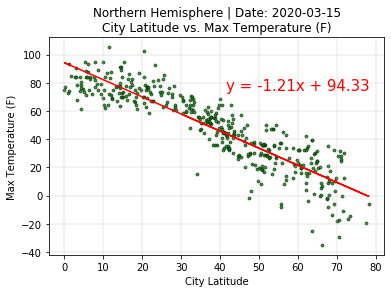

In [16]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Max Temp']

# chart parameters
x_label = 'City Latitude'
y_label = 'Max Temperature (F)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.62
Linear Regression: y = 0.47x + 84.18
---------------------------------------------


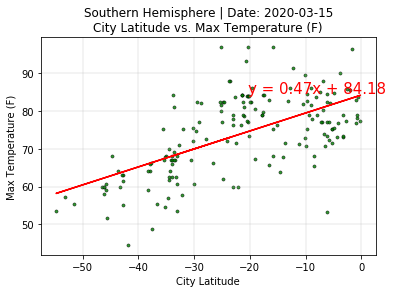

In [17]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Max Temp']

# chart parameters
x_label = 'City Latitude'
y_label = 'Max Temperature (F)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.28
Linear Regression: y = 0.32x + 58.25
---------------------------------------------


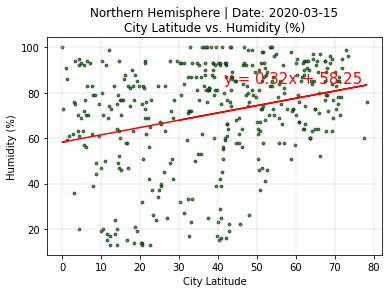

In [18]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Humidity']

# chart parameters
x_label = 'City Latitude'
y_label = 'Humidity (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.24
Linear Regression: y = 0.34x + 81.71
---------------------------------------------


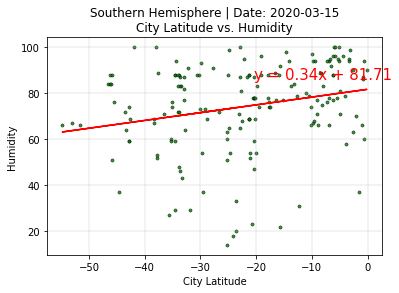

In [19]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Humidity']

# chart parameters
x_label = 'City Latitude'
y_label = 'Humidity'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.21
Linear Regression: y = 0.39x + 41.41
---------------------------------------------


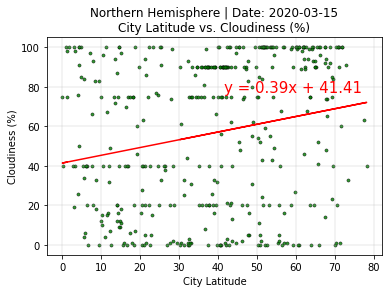

In [20]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Cloudiness']

# chart parameters
x_label = 'City Latitude'
y_label = 'Cloudiness (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.25
Linear Regression: y = 0.68x + 74.54
---------------------------------------------


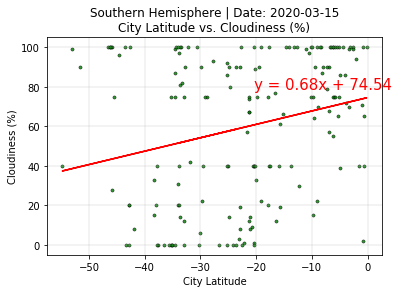

In [21]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Cloudiness']

# chart parameters
x_label = 'City Latitude'
y_label = 'Cloudiness (%)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: 0.22
Linear Regression: y = 0.07x + 6.57
---------------------------------------------


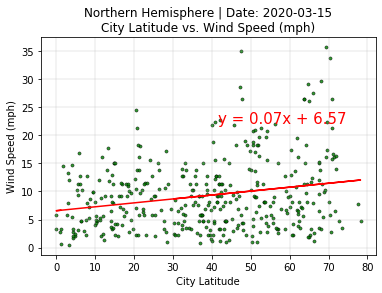

In [22]:
# define data to plot 
x_axis_lat = nth_hem_df['Latitude']
y_axis_lat = nth_hem_df['Wind Speed']

# chart parameters
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

---------------------------------------------
The r-squared value is: -0.39
Linear Regression: y = -0.17x + 4.61
---------------------------------------------


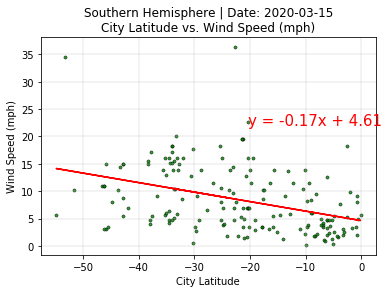

In [23]:
# define data to plot 
x_axis_lat = sth_hem_df['Latitude']
y_axis_lat = sth_hem_df['Wind Speed']

# chart parameters
x_label = 'City Latitude'
y_label = 'Wind Speed (mph)'

# plot and export file
lin_regr (x_axis_lat, y_axis_lat, x_label, y_label )